In [40]:
import pandas as pd
# Import the xlrd module
import openpyxl
import numpy as np

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
folder = "/Users/mallu899/Mirror/projects/PaperIV_code/gitRepo/DotDetectionKinetics/V52A_data/"

In [48]:
def normalizeTimesAddStrain( OSym="even", run=1):
    df_even = pd.read_excel(folder+'dots_run{}_even.xlsx'.format(run), engine='openpyxl')
    df_odd = pd.read_excel(folder+'dots_run{}_odd.xlsx'.format(run), engine='openpyxl')
    print(len(df_even), len(df_odd))
    time1 = np.round(df_odd.iloc[0]["time"]/1000)
    #print(time1, np.round(df_odd["time"]/1000))
    norm_time_odd = np.round(df_odd["time"]/1000)-time1 
    norm_time_even = np.round(df_even["time"]/1000)-time1
    df_odd["Time (s)"] = norm_time_odd
    df_even["Time (s)"]  = norm_time_even
    if OSym=="even":
        df_even["Strain"] = ["OSymL" for x in range(len(df_even))]
        df_odd["Strain"] = ["term" for x in range(len(df_odd))]
    else:
        df_even["Strain"] = ["term" for x in range(len(df_even))]
        df_odd["Strain"] = ["OSymL"  for x in range(len(df_odd))]
    
    df = pd.concat([df_odd, df_even])
    df["Run"] = [run for x in range(len(df_odd)+len(df_even))]
    return(df)

In [49]:
def allRuns(ids_runs, locs_OSym):
    df1 = normalizeTimesAddStrain( OSym=locs_OSym[0], run=ids_runs[0])
    for i,m in zip(ids_runs[1:], locs_OSym[1:]):
        df = normalizeTimesAddStrain( OSym=m, run=i)
        df1 = pd.concat([df1,df])
    return(df1)

14493 20374
13767 19217
13655 13338
15542 11651


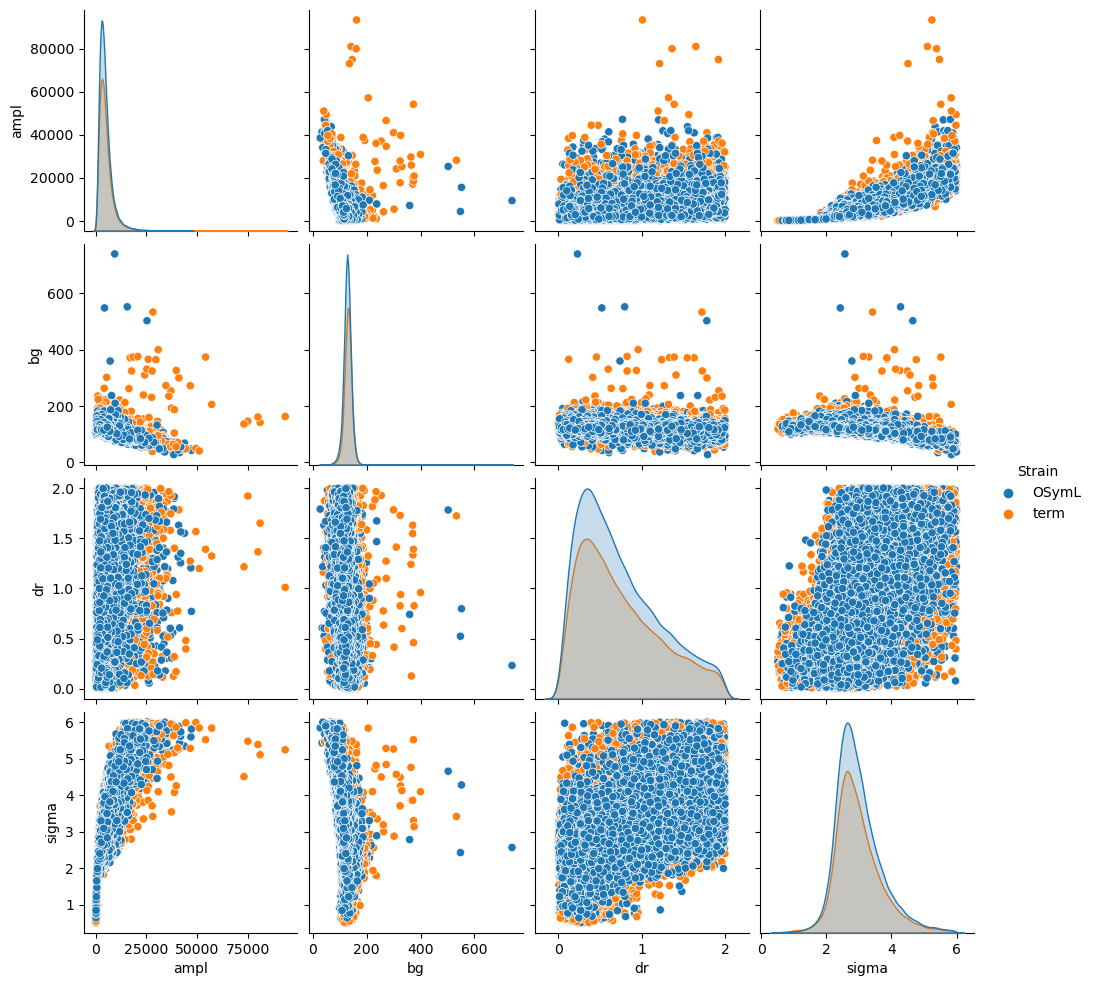

In [50]:
combined_dfs = allRuns([2,3,4,5],["odd","odd", "even", "even"])
dots_b = combined_dfs.drop(columns=["coord_1","coord_2","internalCoord_1","internalCoord_2","id",\
                                      "err_1","err_2","err_3", "Position", "time", "Time (s)", "Run"])
sns.pairplot(dots_b, hue="Strain")

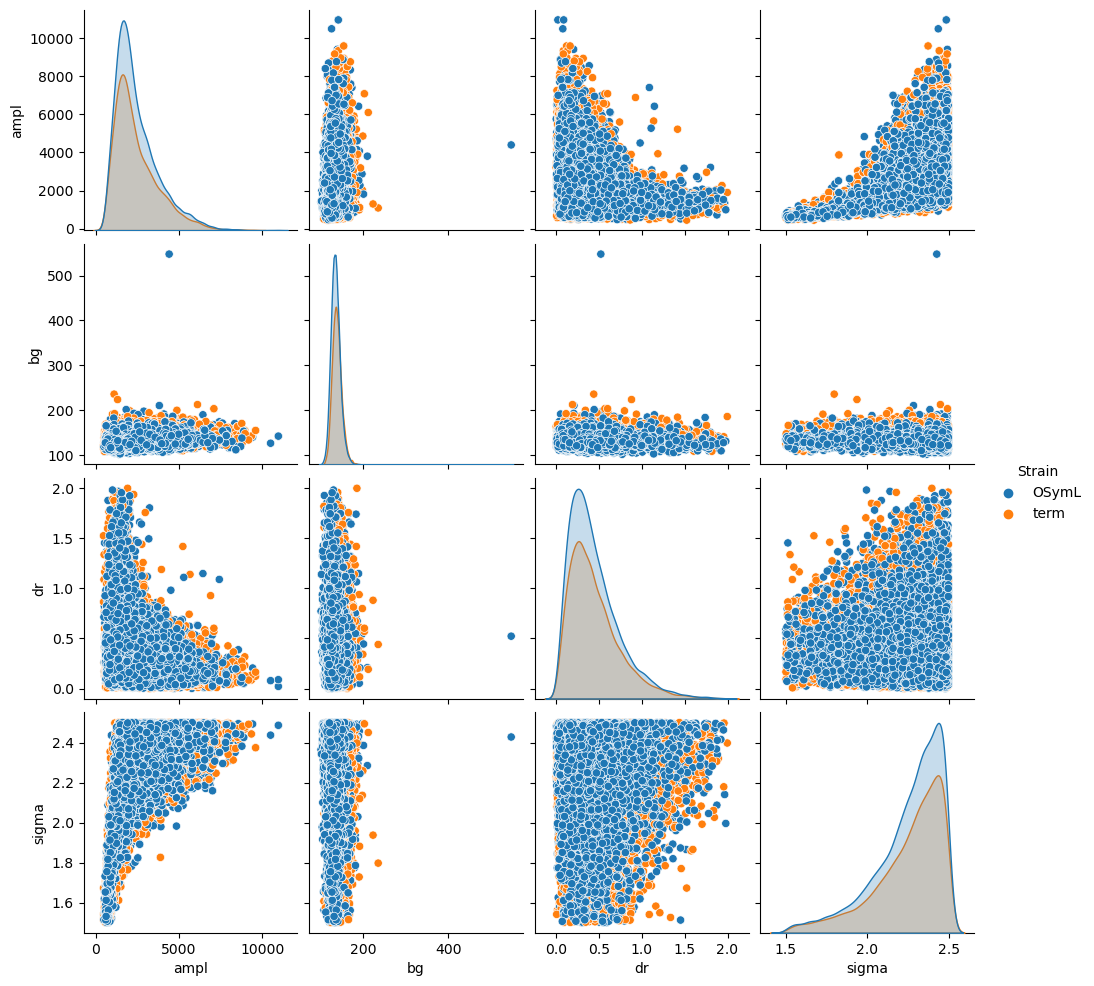

In [52]:
dots_b = combined_dfs[(1.5<=combined_dfs["sigma"])&(combined_dfs["sigma"]<=2.5)].drop(columns=["coord_1","coord_2","internalCoord_1","internalCoord_2","id",\
                                      "err_1","err_2","err_3", "Position", "time", "Time (s)", "Run"])
sns.pairplot(dots_b, hue="Strain")

14493 20374


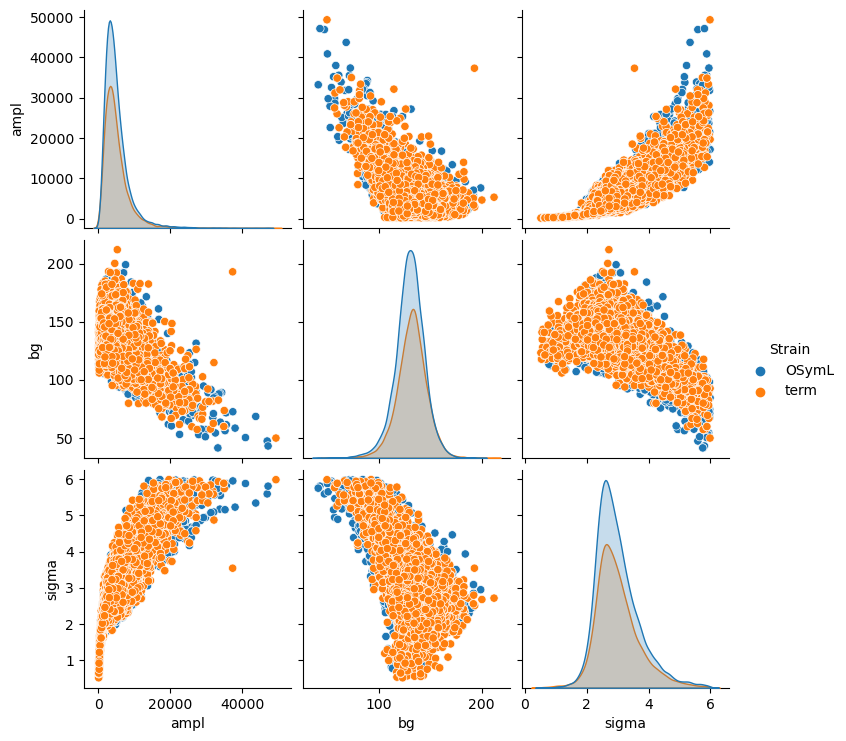

In [27]:
run = normalizeTimesAddStrain(OSym="odd", run=2)
dots_b = run.drop(columns=["coord_1","coord_2","internalCoord_1","internalCoord_2","id",\
                                      "err_1","err_2","err_3","dr", "Position", "time", "Time (s)", "Run"])
sns.pairplot(dots_b, hue="Strain")

13767 19217


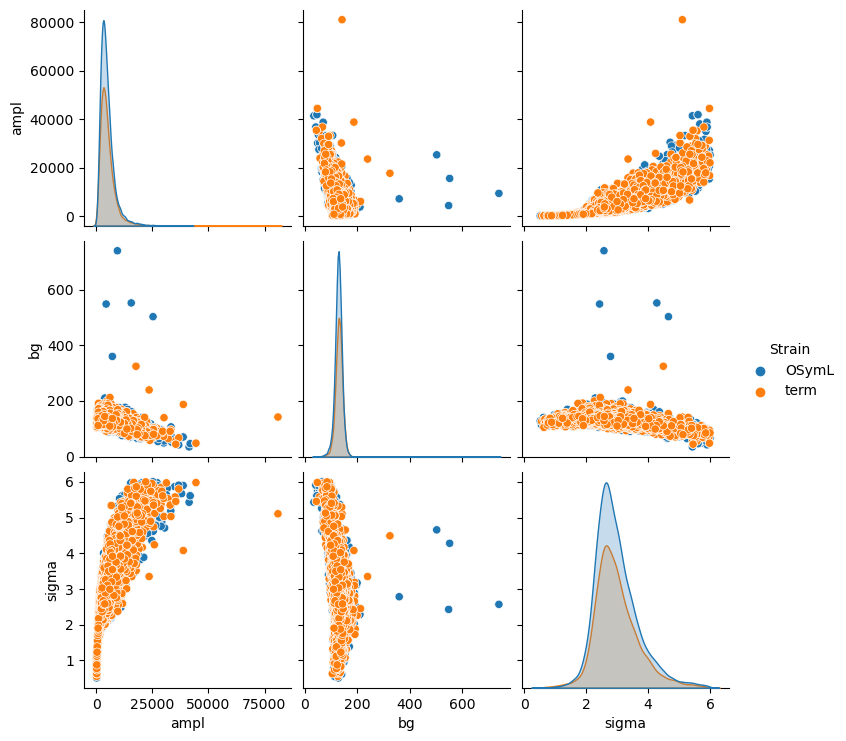

In [28]:
run = normalizeTimesAddStrain(OSym="odd", run=3)
dots_b = run.drop(columns=["coord_1","coord_2","internalCoord_1","internalCoord_2","id",\
                                      "err_1","err_2","err_3","dr", "Position", "time", "Time (s)", "Run"])
sns.pairplot(dots_b, hue="Strain")

10218 10287


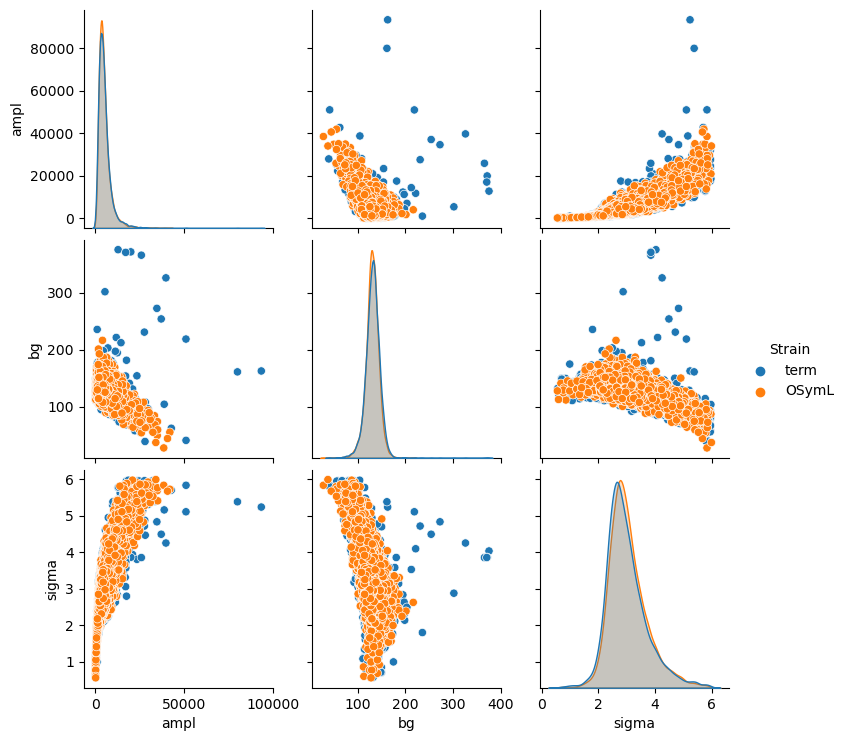

In [57]:
run = normalizeTimesAddStrain(OSym="even", run=4)
dots_b = run.drop(columns=["coord_1","coord_2","internalCoord_1","internalCoord_2","id",\
                                      "err_1","err_2","err_3","dr", "Position", "time", "Time (s)", "Run","numCells"])
sns.pairplot(dots_b, hue="Strain")

15542 11651


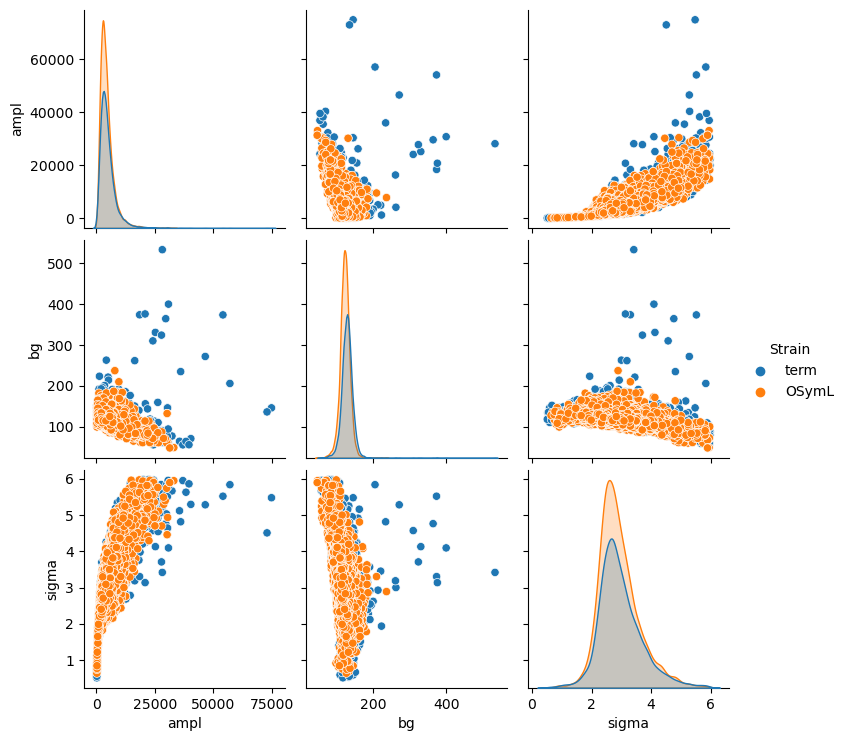

In [30]:
run = normalizeTimesAddStrain(OSym="even", run=5)
dots_b = run.drop(columns=["coord_1","coord_2","internalCoord_1","internalCoord_2","id",\
                                      "err_1","err_2","err_3","dr", "Position", "time", "Time (s)", "Run"])
sns.pairplot(dots_b, hue="Strain")

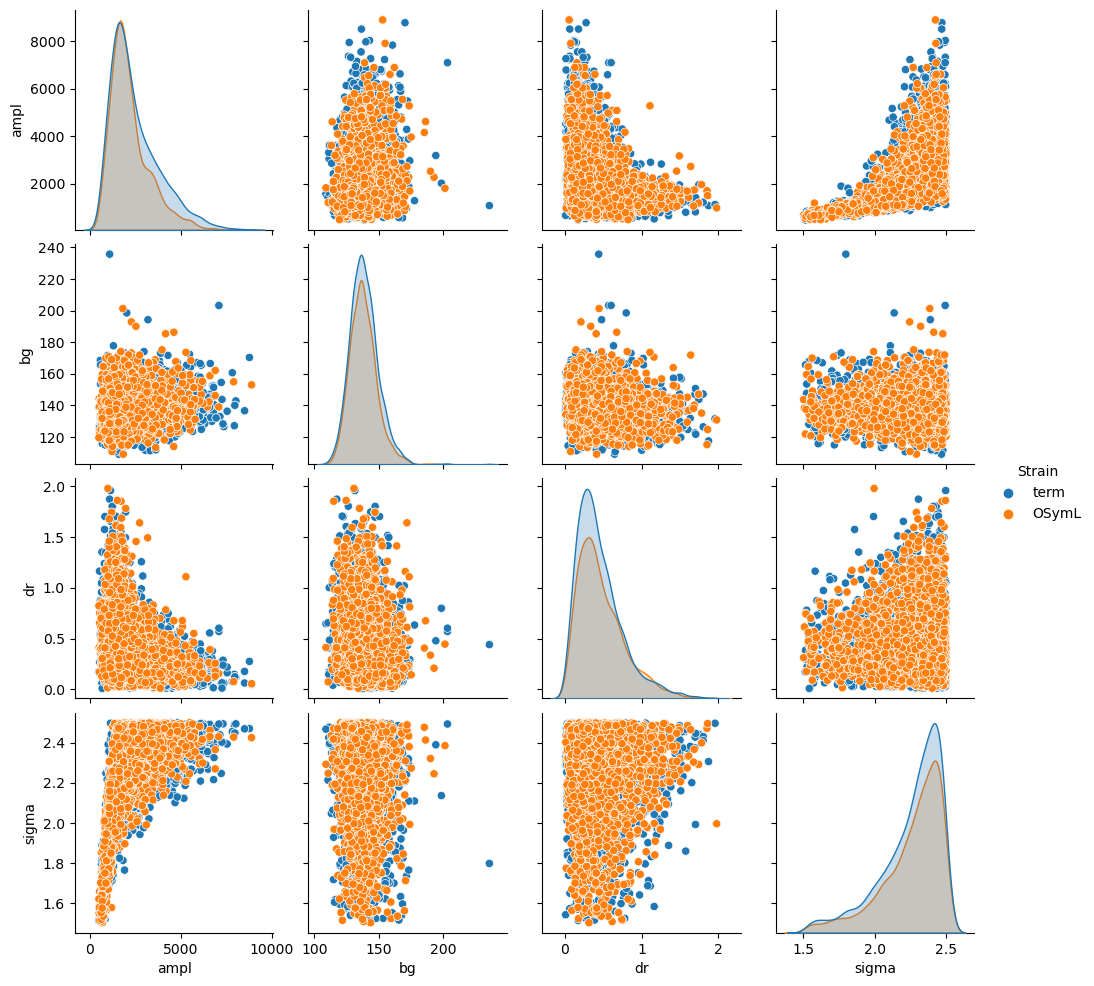

In [55]:
dots_b = run[(1.5<=run["sigma"])&(run["sigma"]<=2.5)].drop(columns=["coord_1","coord_2","internalCoord_1","internalCoord_2","id",\
                                      "err_1","err_2","err_3", "Position", "time", "Time (s)", "Run"])
sns.pairplot(dots_b, hue="Strain")

Position  Strain
1         OSymL      314
          term        21
2         OSymL      314
          term        19
3         OSymL      331
          term        24
4         OSymL      328
          term        25
5         OSymL      401
          term       107
6         OSymL      475
          term       342
7         OSymL      497
          term         6
8         OSymL      486
          term       593
9         OSymL      533
          term       639
10        OSymL      513
          term       650
11        OSymL      759
          term       664
12        OSymL      722
          term       673
13        OSymL      790
          term       663
14        OSymL      736
          term       616
15        OSymL      736
          term       661
16        OSymL      749
          term       659
17        OSymL     1639
          term      1048
18        OSymL     1805
          term      1406
19        OSymL     1687
          term      1433
20        OSymL     1727
        

Columns: 
 coord_1 - x-coordinate
 coord_2 - y-coordinate
 internalCoord_1 - cell long axis coordinate [0,1]
 internalCoord_2 - cell short axis coordinate [-1;1]
 err_1 - localization uncertainty along x-axis
 err_2 - localization uncertainty along y-axis
 err_3 - covariance x-y
 ampl - spot amplitude in photons
 bg - background in photons
 id - dot id
 dr - the distance between detected and localized dots, in pixels
 sigma - Gaussian spot width

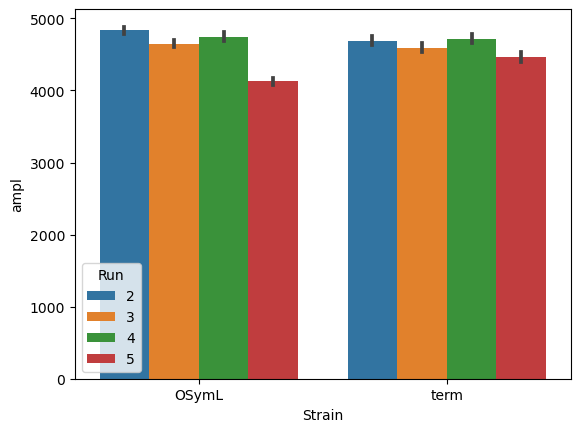

In [32]:
sns.barplot(data = combined_dfs, x = "Strain", y = "ampl", hue="Run")
plt.show()

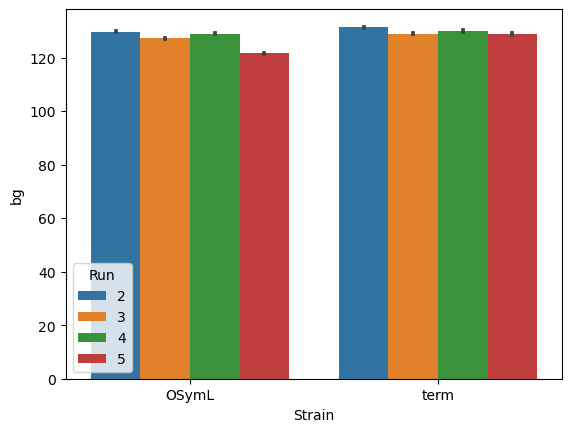

In [37]:
sns.barplot(data = combined_dfs, x = "Strain", y = "bg", hue="Run")
plt.show()

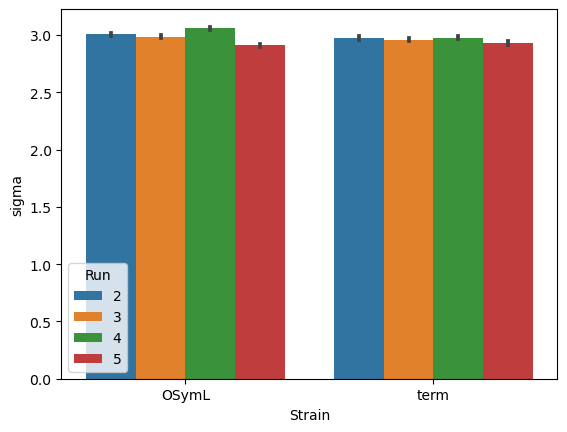

In [38]:
sns.barplot(data = combined_dfs, x = "Strain", y = "sigma", hue="Run")
plt.show()